In [437]:
import os,glob
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.animation as animation

In [438]:
files =glob.glob("3D_eden_cpp/standard_data/prof_T*.txt")
nums = [int(files[i].split("T")[1].split("_")[0]) for i in range(len(files))]
files = np.array(files)[np.argsort(nums)]

In [439]:
f=files[-1]
arr =np.loadtxt(f,delimiter=", ").astype(int)
state=np.zeros((500,500,500))
state[arr]=1

zmaxwhere = arr
zmax = np.zeros((500,500))
for m in range(len(zmaxwhere)):
    if zmax[tuple(zmaxwhere[m][:2])]< zmaxwhere[m][2]:
        zmax[tuple(zmaxwhere[m][:2])] =zmaxwhere[m][2]

In [443]:
zhists =np.zeros((len(files),500,500))
for i,f in enumerate(files):


    arr =np.loadtxt(f,delimiter=", ").astype(int)


    zmaxwhere = arr
    zmax = np.zeros((500,500))
    for m in range(len(zmaxwhere)):
        if zmax[tuple(zmaxwhere[m][:2])]< zmaxwhere[m][2]:
            zmax[tuple(zmaxwhere[m][:2])] =zmaxwhere[m][2]

        zhists[i] = zmax


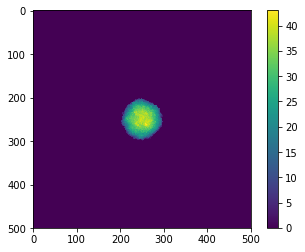

In [445]:
fig,ax =plt.subplots()

im=ax.imshow(zhists[-1],vmin=0,vmax=np.max(zhists))

ims = []
for add in range(len(files)):
    ims.append((ax.imshow(zhists[add],vmin=0,vmax=np.max(zhists)),))

im_ani = animation.ArtistAnimation(fig, ims, interval=2000, repeat_delay=3000,
                                   blit=True)
                 
plt.colorbar(im)
# To save this second animation with some metadata, use the following command:
# im_ani.save('im.mp4', metadata={'artist':'Guido'})
im_ani.save('im.gif',writer='imagemagick')



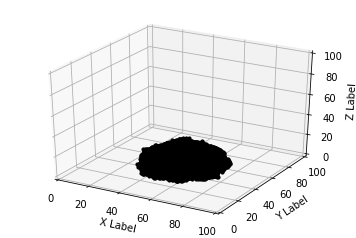

In [349]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].

    
for m in np.argwhere(arr==1):
    ax.scatter(*m,c='k',s=10)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

ax.set_xlim([0,100])
ax.set_ylim([0,100])
ax.set_zlim([0,100])
plt.show()